In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-06T20:15:57.635572+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

/home/runner/work/multilevel-selection-concept/multilevel-selection-concept/binder/pylib/_SyncHostCompartmentsSimple.py:158: UserWarning: exposed_variant and infectious_variant are both NaN
  warnings.warn(


  Running 2020-02-09 (20/650) (1.34 s)  ———————————————————— 3%
  Running 2020-02-19 (30/650) (2.13 s)  ———————————————————— 5%
  Running 2020-02-29 (40/650) (2.92 s)  •——————————————————— 6%
  Running 2020-03-10 (50/650) (3.70 s)  •——————————————————— 8%
  Running 2020-03-20 (60/650) (4.53 s)  •——————————————————— 9%
  Running 2020-03-30 (70/650) (5.39 s)  ••—————————————————— 11%
  Running 2020-04-09 (80/650) (6.23 s)  ••—————————————————— 12%
  Running 2020-04-19 (90/650) (7.07 s)  ••—————————————————— 14%
  Running 2020-04-29 (100/650) (7.89 s)  •••————————————————— 16%
  Running 2020-05-09 (110/650) (8.71 s)  •••————————————————— 17%
  Running 2020-05-19 (120/650) (9.52 s)  •••————————————————— 19%
  Running 2020-05-29 (130/650) (10.33 s)  ••••———————————————— 20%
  Running 2020-06-08 (140/650) (11.30 s)  ••••———————————————— 22%
  Running 2020-06-18 (150/650) (12.35 s)  ••••———————————————— 23%
  Running 2020-06-28 (160/650) (13.38 s)  ••••———————————————— 25%
  Running 2020-07-0

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2411346435546875e-05}
enter log_context_duration for _do_sequences


  1%|          | 1/193 [00:05<18:51,  5.89s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 5.581741571426392}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.11375999450683594}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01824164390563965}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9788742065429688e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00012111663818359375}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 7.891654968261719e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0013093948364257812}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9550323486328125e-05}
enter lo

 11%|█         | 21/193 [00:06<00:30,  5.71it/s]

exit log_context_duration for extract
!!! {"extract": 0.0003936290740966797}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002529621124267578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0003674030303955078}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0001857280731201172}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020456314086914062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9550323486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.557868957519531e-0

 21%|██        | 40/193 [00:06<00:10, 14.80it/s]

enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.002452850341796875}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.001039266586303711}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003139972686767578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.4557113647460938e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.390975952148438e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.437301635742188e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001742839813232422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! 

 25%|██▌       | 49/193 [00:06<00:06, 20.67it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003986358642578125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.390975952148438e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018835067749023438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00010037422180175781}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.651878356933594e-05}
ent

 35%|███▌      | 68/193 [00:06<00:03, 35.36it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004031658172607422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00013446807861328125}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.937980651855469e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017881393432617188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00010013580322265625}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.3882598876953125e-05}
ente

 46%|████▌     | 88/193 [00:06<00:01, 53.39it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00041675567626953125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 8.0108642578125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.221366882324219e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017452239990234375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0037920475006103516}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0014295578002929688}
enter lo

 56%|█████▋    | 109/193 [00:07<00:01, 68.59it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.2411346435546875e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.462501525878906e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.508827209472656e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002639293670654297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.343292236328125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.935264587402344e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!

 67%|██████▋   | 130/193 [00:07<00:00, 77.76it/s]

enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.00014972686767578125}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 8.368492126464844e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000194549560546875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.271766662597656e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.030632019042969e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017189979553222656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!

 72%|███████▏  | 139/193 [00:07<00:00, 78.04it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00031638145446777344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0027875900268554688}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0010726451873779297}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00031375885009765625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.271766662597656e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.9114227294921875e-05}
enter

 77%|███████▋  | 148/193 [00:07<00:00, 74.55it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7894973754882812e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.271766662597656e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.699562072753906e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002372264862060547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.224082946777344e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.91278076171875e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!!

 85%|████████▍ | 164/193 [00:07<00:00, 57.83it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.47955322265625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.62939453125e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 4.935264587402344e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022411346435546875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0018079280853271484}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0007662773132324219}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"r

 91%|█████████ | 176/193 [00:08<00:00, 33.33it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7418136596679688e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.462501525878906e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 6.532669067382812e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003066062927246094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8596649169921875e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.772445678710938e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.1021575927734375e-05}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!

100%|██████████| 193/193 [00:08<00:00, 22.06it/s]


exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00040340423583984375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8596649169921875e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.0004200935363769531}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.0001800060272216797}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020194053649902344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 7.43865966796875e-05}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 5.0067901611328125e-05}


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0018494129180908203}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03325963020324707}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.011617898941040039}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0017056465148925781}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03335762023925781}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.005204439163208008}
enter log_context_duration for seq_

 43%|████▎     | 3/7 [00:00<00:00, 19.77it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03700375556945801}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.015032291412353516}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002242565155029297}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 4.291534423828125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.042633771896362305}
enter log_context_duration for res.collect


 71%|███████▏  | 5/7 [00:00<00:00, 15.93it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.022896766662597656}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002210855484008789}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04563570022583008}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.026537656784057617}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0020864009857177734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.05285072326660156}
enter log_context_duration for res.collect
exit log_context_duration for res.col

100%|██████████| 7/7 [00:00<00:00, 15.17it/s]


exit log_context_duration for mismatches
!!! {"mismatches": 0.03392767906188965}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.022690773010253906}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.5960030555725098}
sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 0, 1, 2, 3, 4
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2999906539916992}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    33850
{"0": "'"}     5900
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequ

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.20266127586364746}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 5913/5913 [00:26<00:00, 226.09it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.058196306228638}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 5913/5913 [00:06<00:00, 915.15it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 192.53995943069458}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.07608175277709961}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 253.66880106925964}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.02994847297668457}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.005627155303955078}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00745081901550293}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0011451244354248047}
ancestral_sequ


100%|██████████| 1171/1171 [00:00<00:00, 347423.78it/s]

process mutations:   0%|          | 1/1171 [00:00<04:00,  4.87it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:27<1:08:07,  3.51s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   41.6s



process mutations:   4%|▍         | 48/1171 [02:30<58:47,  3.14s/it] 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.7min



process mutations:   8%|▊         | 88/1171 [04:25<54:01,  2.99s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  4.8min



process mutations:  11%|█         | 128/1171 [06:26<52:10,  3.00s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  7.0min



process mutations:  14%|█▍        | 168/1171 [08:21<49:24,  2.96s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  9.1min



process mutations:  18%|█▊        | 208/1171 [10:11<46:15,  2.88s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed: 11.2min



process mutations:  21%|██        | 248/1171 [12:25<46:47,  3.04s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed: 13.1min



process mutations:  25%|██▍       | 288/1171 [14:23<44:18,  3.01s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed: 15.2min



process mutations:  28%|██▊       | 328/1171 [16:27<42:42,  3.04s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed: 17.1min



process mutations:  31%|███▏      | 368/1171 [18:21<39:54,  2.98s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 19.0min



process mutations:  35%|███▍      | 408/1171 [20:11<36:57,  2.91s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 20.7min



process mutations:  38%|███▊      | 448/1171 [22:15<35:45,  2.97s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 22.7min



process mutations:  42%|████▏     | 488/1171 [24:03<32:52,  2.89s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 24.7min



process mutations:  45%|████▌     | 528/1171 [25:48<30:02,  2.80s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 26.8min



process mutations:  49%|████▊     | 568/1171 [27:32<27:36,  2.75s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 28.6min



process mutations:  52%|█████▏    | 608/1171 [29:24<25:52,  2.76s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 30.4min



process mutations:  55%|█████▌    | 648/1171 [31:17<24:13,  2.78s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 32.3min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 32.5min



process mutations:  59%|█████▉    | 688/1171 [33:09<22:26,  2.79s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 34.6min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 34.6min



process mutations:  62%|██████▏   | 728/1171 [35:15<21:22,  2.90s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 36.5min



process mutations:  66%|██████▌   | 768/1171 [36:58<18:47,  2.80s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 38.6min



process mutations:  69%|██████▉   | 808/1171 [38:39<16:26,  2.72s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 40.7min



process mutations:  72%|███████▏  | 848/1171 [40:43<15:15,  2.84s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 42.4min



process mutations:  76%|███████▌  | 888/1171 [42:42<13:33,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 44.5min



process mutations:  79%|███████▉  | 928/1171 [44:39<11:41,  2.89s/it]

[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 46.4min



process mutations:  83%|████████▎ | 968/1171 [46:40<09:55,  2.93s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 48.0min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 48.4min



process mutations:  86%|████████▌ | 1008/1171 [48:36<07:55,  2.92s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 48.6min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 49.9min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 50.1min



process mutations:  89%|████████▉ | 1048/1171 [50:34<06:00,  2.93s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 51.8min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 52.1min



process mutations:  93%|█████████▎| 1088/1171 [52:22<03:57,  2.86s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 52.4min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 53.8min



process mutations:  96%|█████████▋| 1128/1171 [54:10<02:00,  2.81s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 54.2min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 55.7min



process mutations: 100%|██████████| 1171/1171 [55:57<00:00,  2.87s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 56.0min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done 1141 tasks      | elapsed: 56.5min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 57.4min finished


process replicate: 100%|██████████| 1/1 [1:01:45<00:00, 3705.56s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.31659650802612305}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887, 0.5791735649108887
$ mut_nobs                       <u32> 76404, 76404, 76404, 76404, 76404
$ mut_uuid                       <str> 'ee1586a9-446f-8583-8de9-fd35e68ae862', 'ee1586a9-446f-8583-8de9-fd35e68ae862', 'ee1586a9-446f-8583-8de9-fd35e6
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 10987, 11370, 10968, 11368, 9422
$ phyo_df_screened_len           <u16> 839, 456, 858, 458, 2404
$ tb_stat                      

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


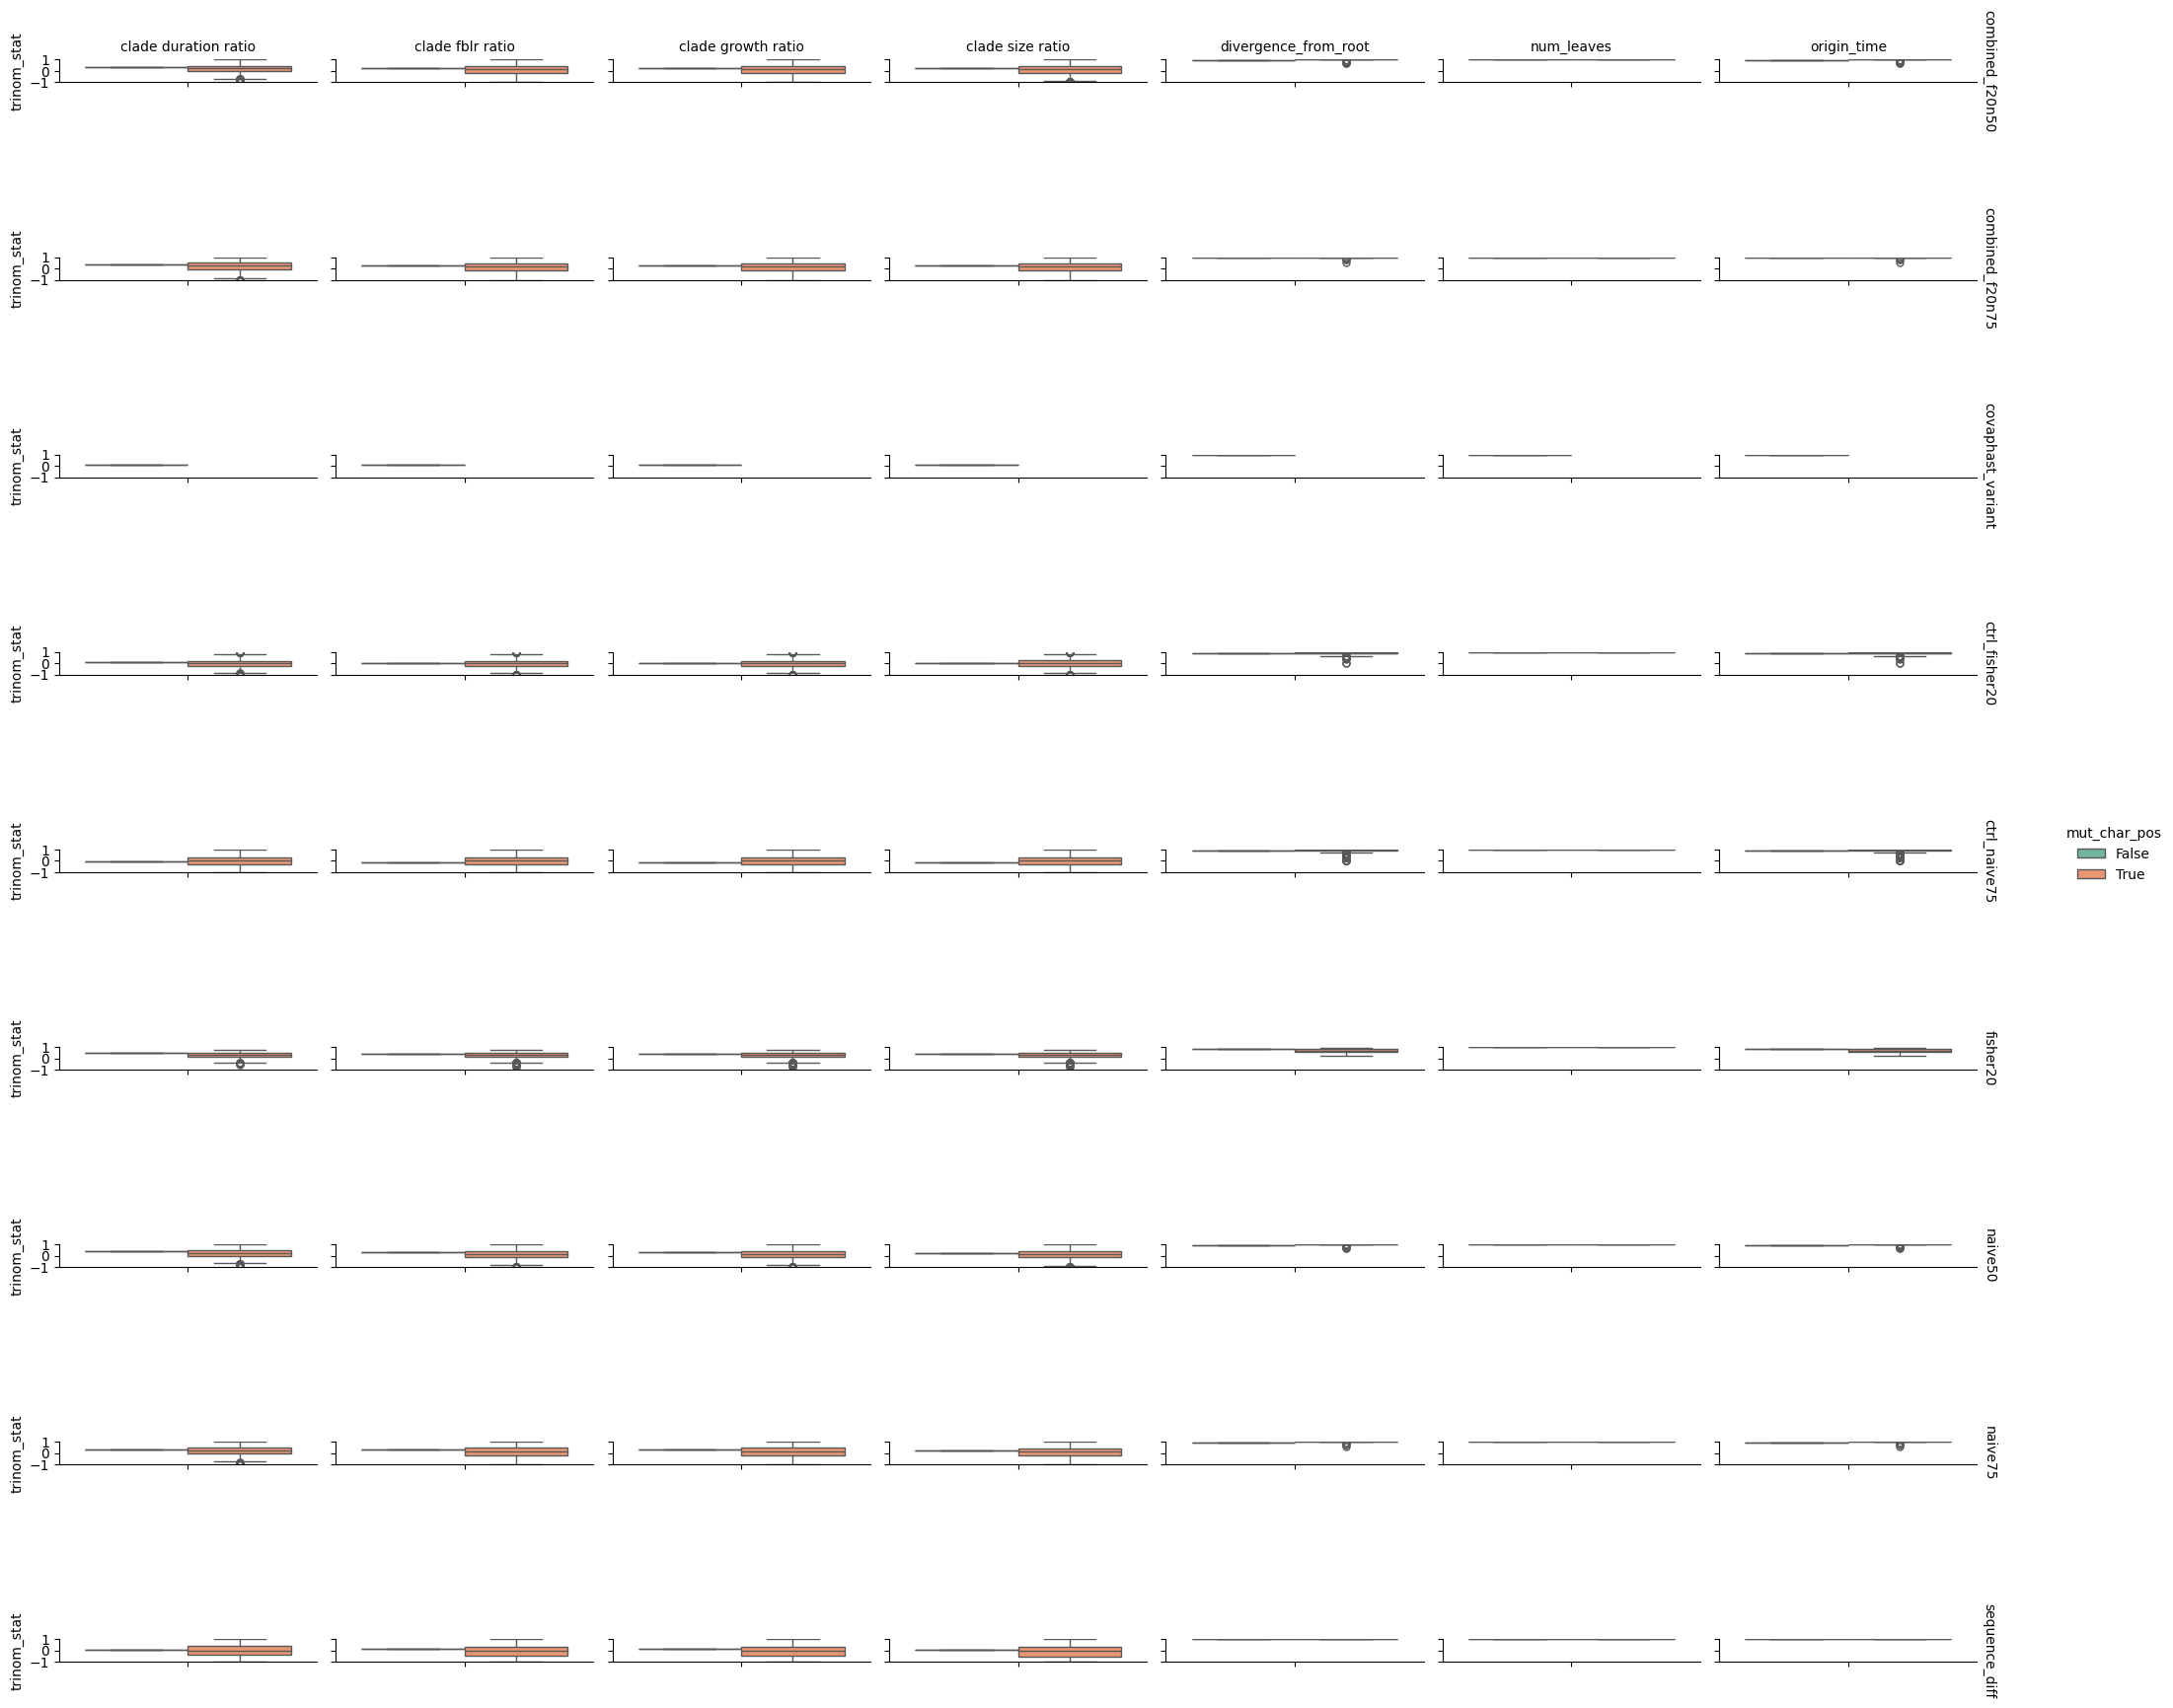

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


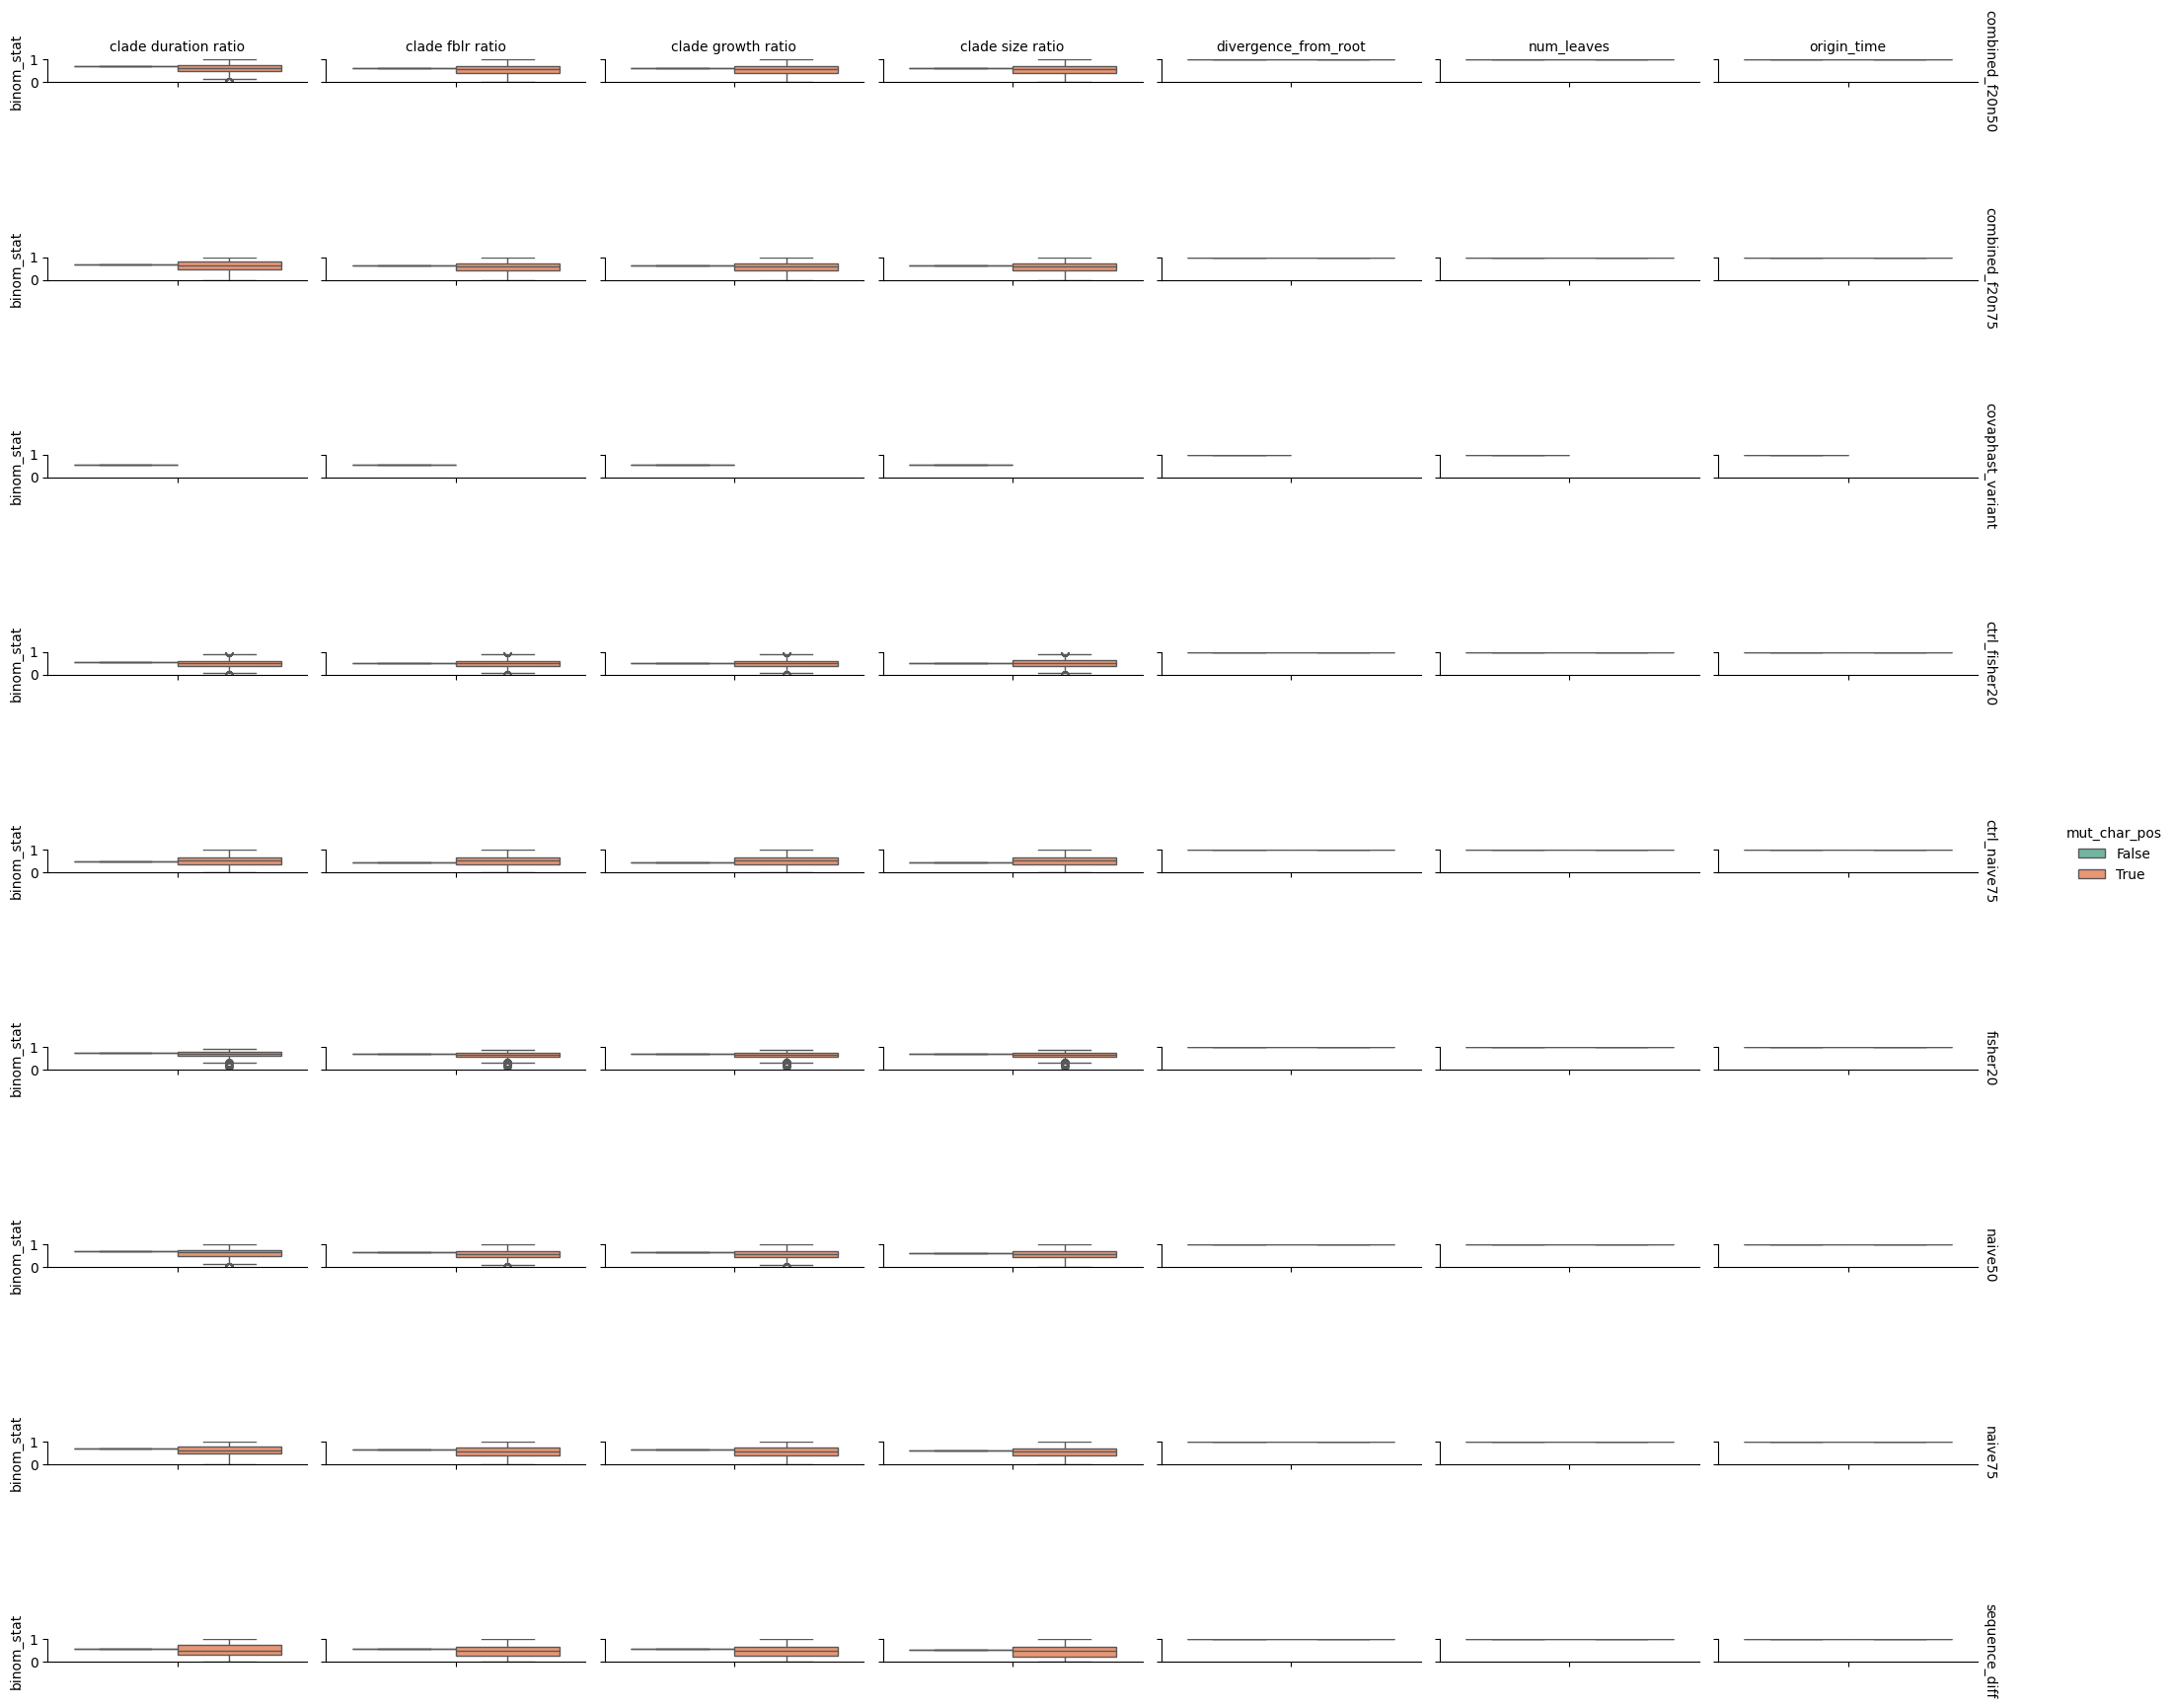

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


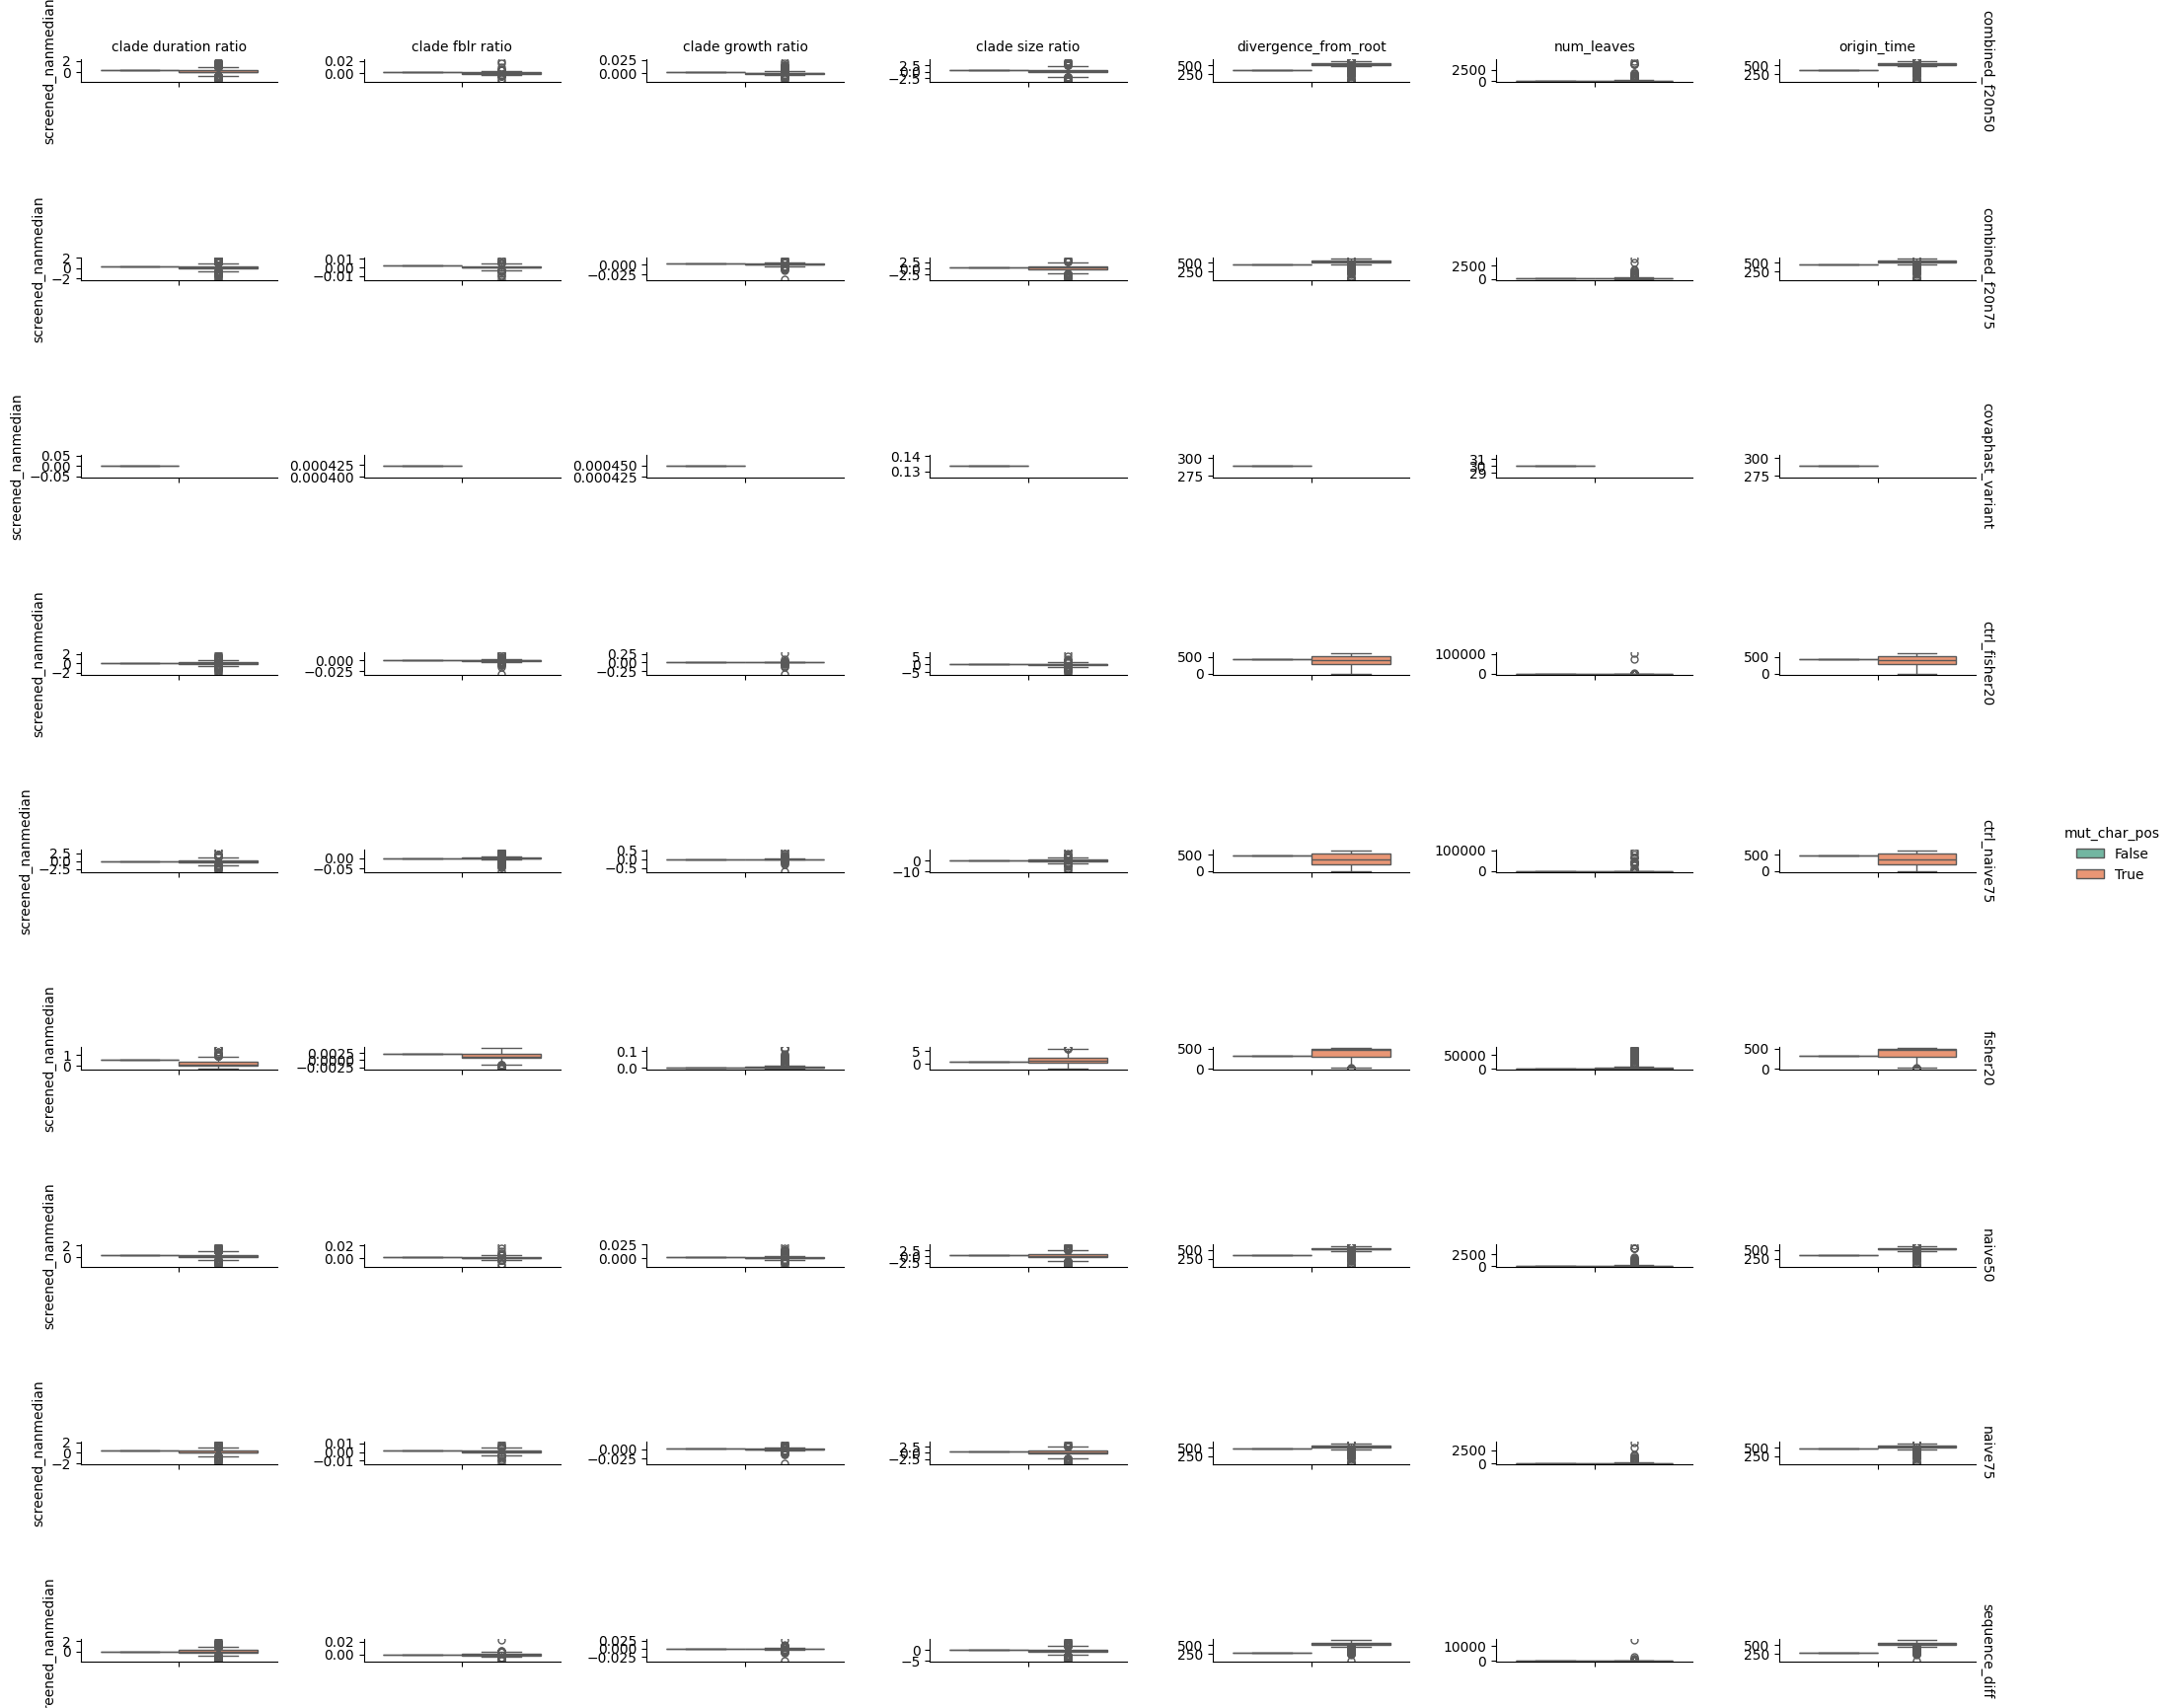

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


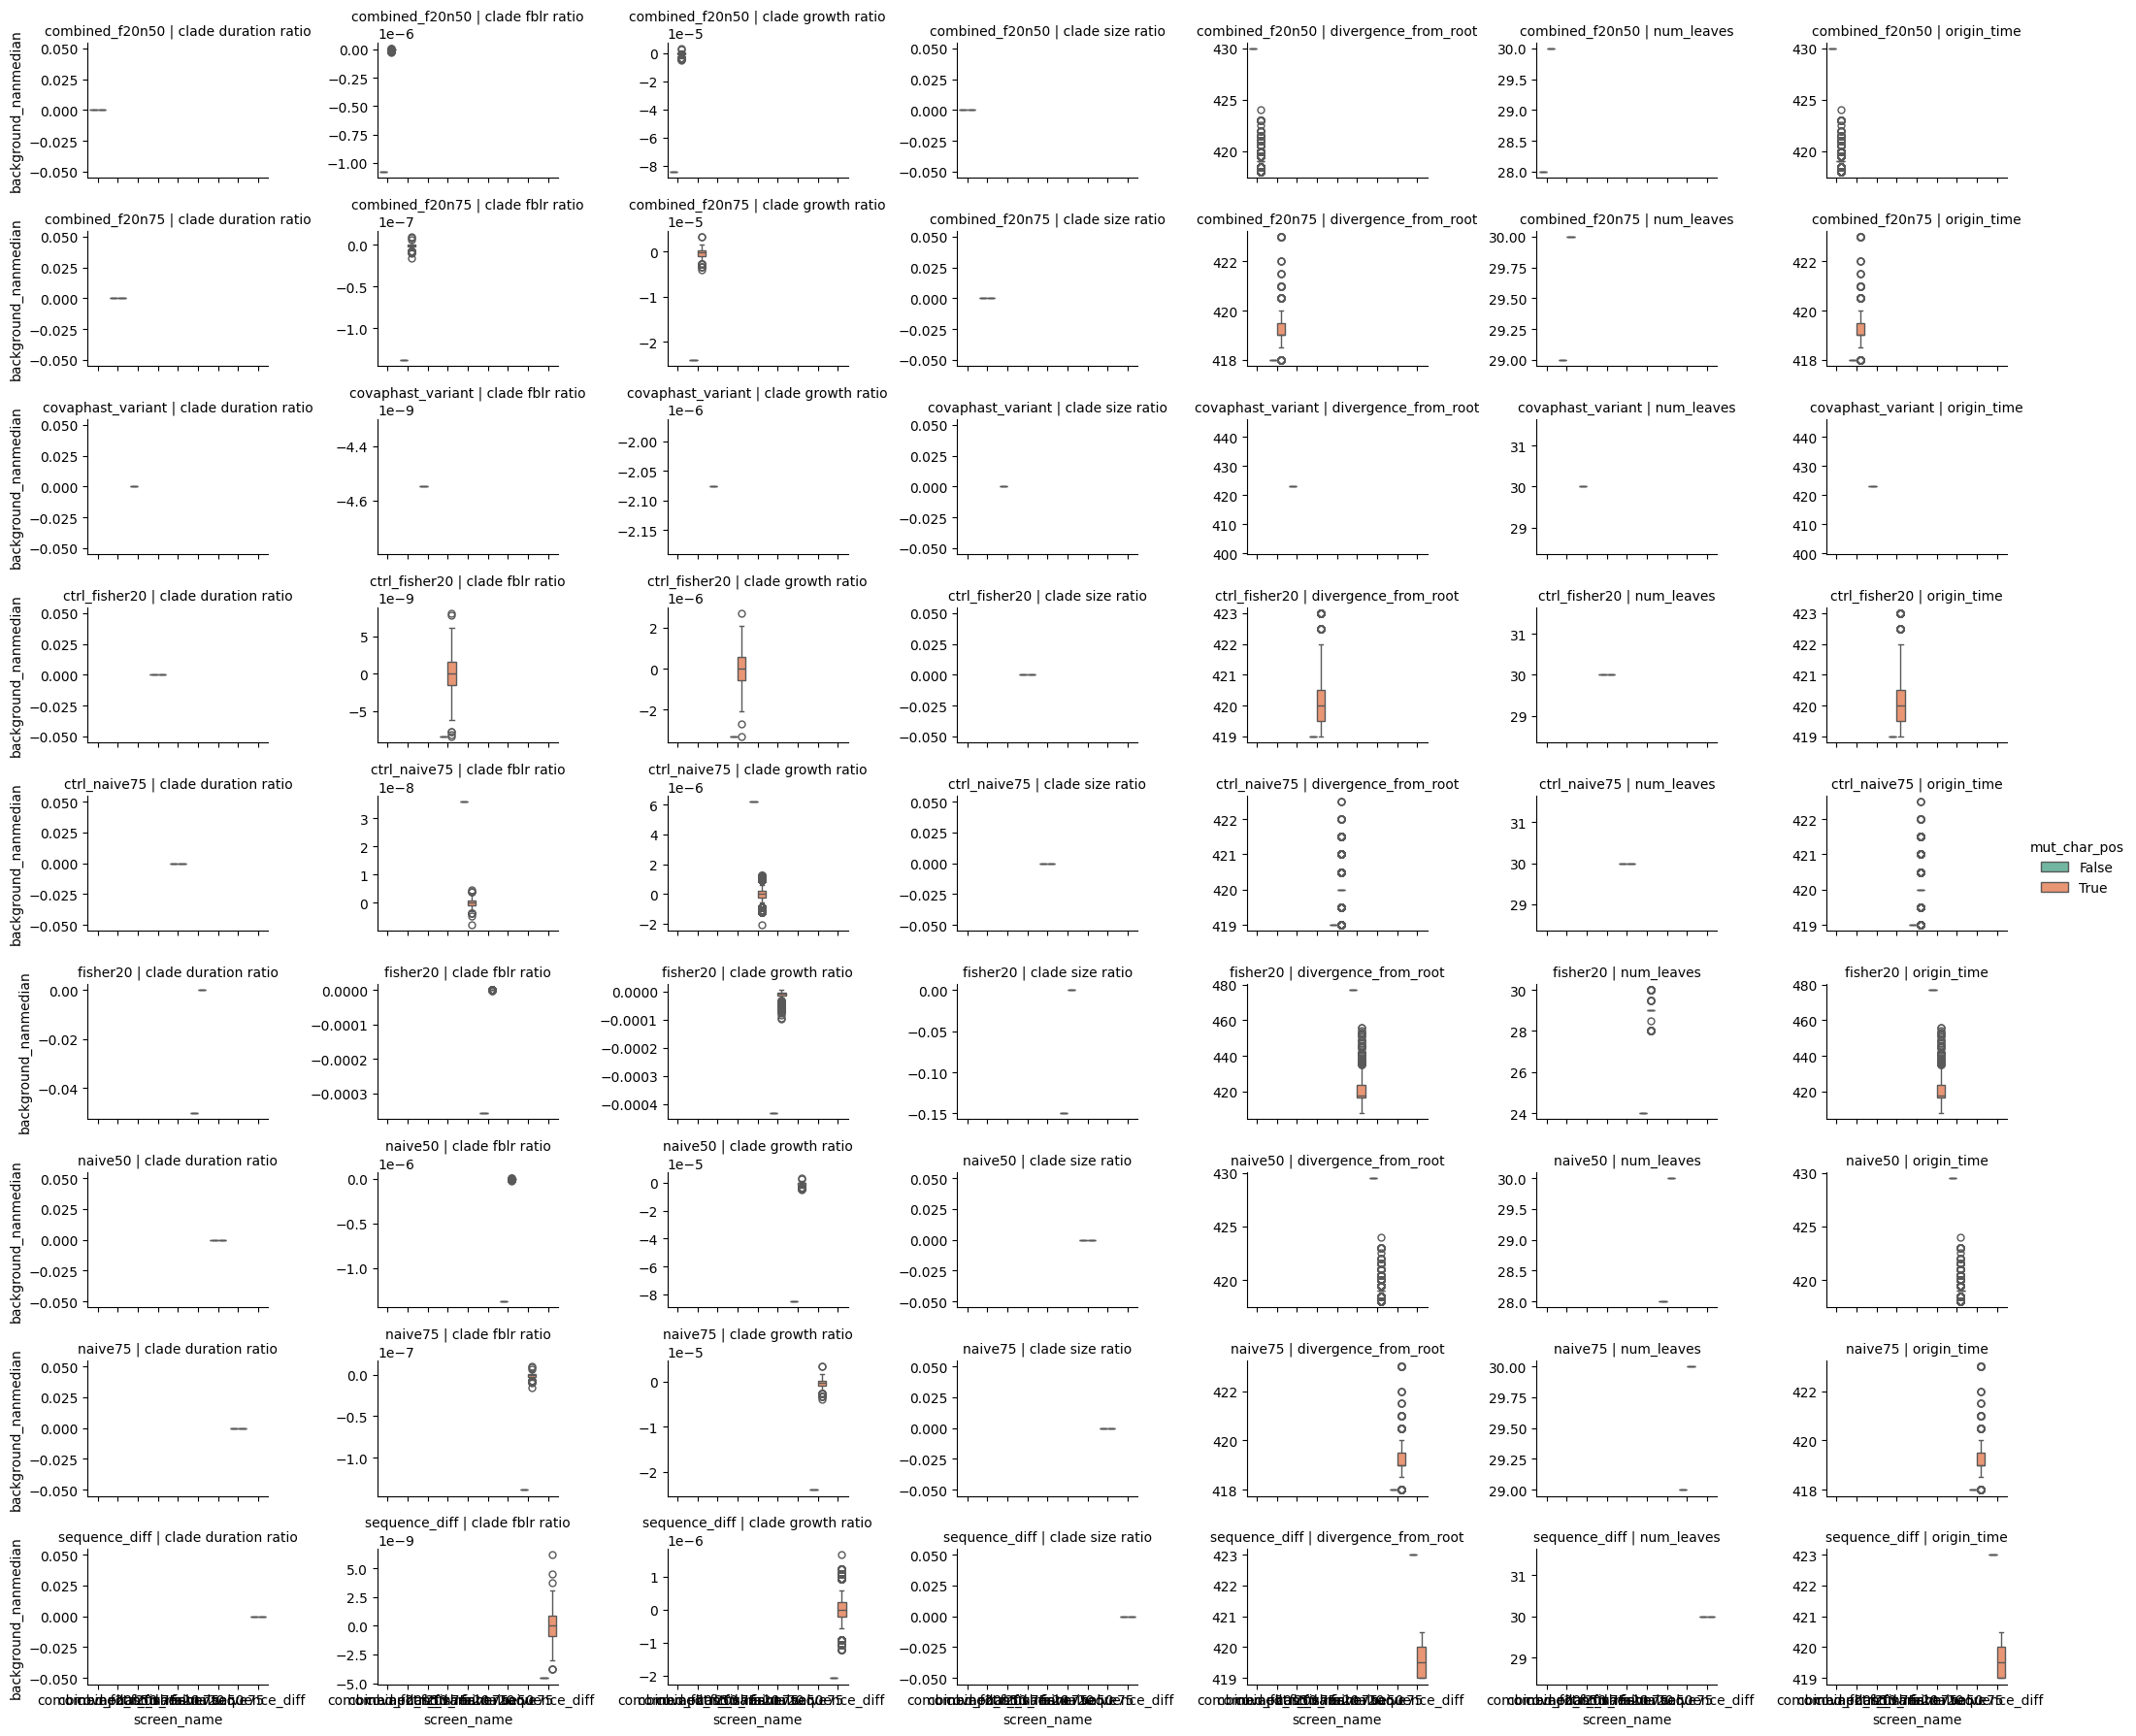

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
